<h1 class="text-center">Introduction to Machine Learning: Titanic learning from the disaster</h1>
<h2 class="text-center">February, 2022</h2>


The purpose of this tutorial is to to predict who will survive and who will die on the Titanic using passengers data (age, ticket price, class, etc). The data are coming from a [Kaggle datascience competition](https://www.kaggle.com/c/titanic). You will use Pandas to load and pre-process the data and Sklearn for the classification part. 


![](img/dicap_titanic.png)

- In Section I, exploration data analysis, visualization and basic prediction based on gender
- In Section II, data pre-processing: scalling, missing values and categorical data encoding
- In Section III, a first pipeline using Logistic Regression 
- In Section IV, a second pipeline using RandomForest
- The last section (V) is an opportunity to improve and explore other pipelines (XGBoost, Ensemble Learning,...) from what you learnt today.

The code must be completed after each ❓ **Question** ❓. A blank cell with "HERE" appears as a comment in the code. The parameters that do not change the course of the story are accompanied "EDIT ME!" as a comment: you can change them at the time or at the end of the section to see the changes involved.

You can also find some 🔴 HINTS 🔴 with associated links to documentation and usefull functions.

In [1]:
import numpy as np # library for numerical analysis
import pandas as pd # library for data manipulation: data frame
import matplotlib.pyplot as plt # library for plotting
import seaborn as sns # advanced library for plotting

## Section I

Load the train CSV file using pandas and display the 5 first rows.

In [2]:
train = pd.read_csv("input/train.csv") 
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We got a column `Survived` that corresponds to the label we will try to predict.  
The `NaN` means that the value is missing. It is something we would need to investigate and correct. 

#### ❓ **Question** ❓ Now do the same with test data.
🔴 HINTS 🔴  
`input/test.csv`

In [3]:
test = pd.read_csv("input/test.csv") # EDIT ME
test.head() # EDIT ME

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is no `Survived` column in the test set, of course !

### Exploration Data Analysis (EDA)

First we will explore the data and do some plotting to know better what we have at hand.

In [4]:
# List of columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hansen, Mr. Henry Damsgaard",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* We have 891 training examples (passengers), that is quite limited but still OK to do Machine Learning.

* It seems that some values are missing (`NaN`). We would need to how many values are missing for each feature.

* Some features are categorical (e.g. `Sex`, `Pclass`, `Embarked`), some other numerical (`Age`, `Fare`, `SibSp`, `Parch`) and finally some alphanumeric (`Ticket`, `Cabin`). We would need to transform the categorical data so they can be processed by a classifier (only numerical data).

### Missing values
🔴 HINTS 🔴  
We will use [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) function to detect and count missing values.

In [6]:
# percentage of missing values
print(pd.isnull(train).sum()/len(train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


The `Cabin` features is missing for 77.1% of the passengers, so we would probably drop it as too many values are missing. 

`Age` is probably an important feature and missing for ~20% of the passengers. We will try to fill the gaps.

### Intuitions on the data
* Based on the movie and on the custom "women and children first", women and kids are probably more likely to survive.
* People in first class are more likely to survive as their cabin is closer to the deck (top of the boat). 
* People traveling alone are more likely to survive as they did not have to wait for relatives that may be slower. 

Let do some plotting to check our intuitions.

#### Male/Female
🔴 HINTS 🔴
- With Pandas to select a column you can simply use: `train["Sex"]`
- [`df.value_counts(normalize = True)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) counts unique values and return a normalized count
- [`df.plot(kind='bar')`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) will plot an histogram of the values

Draw a first bar plot of sex survival by sex and compute mean percentage of male and woman who survived.

Percentage of male: 64.76%


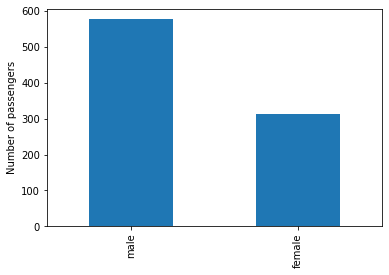

In [7]:
train["Sex"].value_counts(normalize = False).plot(kind='bar', ylabel='Number of passengers')
print("Percentage of male: {0:.2f}%".format(train["Sex"].value_counts(normalize = True)[0]*100))

#### Plot survival rate for womens
Here we will use [Matplotlib](https://matplotlib.org/) library directly and not trough Pandas.

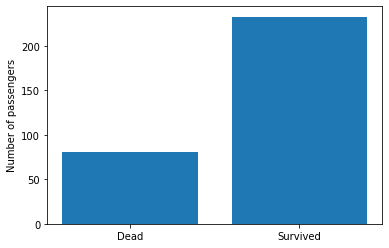

In [8]:
count = train["Survived"][train["Sex"] == 'female'].value_counts(normalize = False)
_ = plt.bar(x=count.index, height=count)
_ = plt.ylabel('Number of passengers')
_ = plt.xticks(ticks=[0,1], labels=['Dead', 'Survived'])

### ❓ **Question** ❓ Do the same with `male`

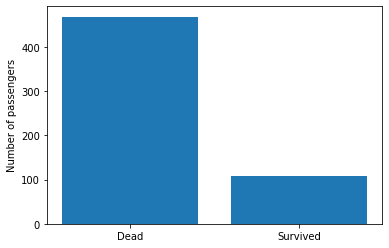

In [9]:
count = train["Survived"][train["Sex"] == 'male'].value_counts(normalize = False) # EDIT ME
_ = plt.bar(x=count.index, height=count)  # EDIT ME
_ = plt.ylabel('Number of passengers')  # EDIT ME
_ = plt.xticks(ticks=[0,1], labels=['Dead', 'Survived'])  # EDIT ME

### ❓ **Question** ❓ Print the proportions in percentage

In [10]:
print("Percentage of females who survived: {0:.2f}%".format(train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True, sort=False)[1]*100)) # EDIT ME

print("Percentage of males who survived: {0:.2f}%".format(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True, sort=False)[1]*100)) # EDIT ME

Percentage of females who survived: 74.20%
Percentage of males who survived: 18.89%


So if we predict that all males will die and all female will survive we would reach an accuracy of: $0.6476\times(1-0.1889) + (1-0.6476)*0.7420)$ = 78.7%. 

Not bad ! Will be hard to beat !

#### Passenger class feature: `Pclass`
We will do the same analysis with passenger this time using an advanced library for plotting: [Seaborn](https://seaborn.pydata.org/).

Percentage of Pclass = 1 who survived: 62.96%
Percentage of Pclass = 2 who survived: 47.28%
Percentage of Pclass = 3 who survived: 24.24%


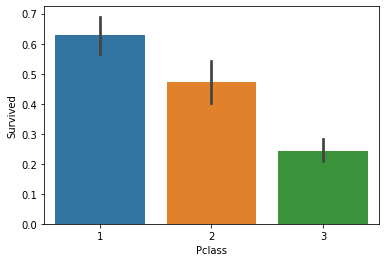

In [11]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 2 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 3 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100))


This could be intersected with the `Sex` feature to improve our first naive classifier.


🔴 HINTS 🔴  
It uses the [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby) function from Pandas.

In [12]:
train.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

96.8% of women from first class have survived and only 13.5% of men from thrid class.

### ❓ **Question** ❓ Create other `grouby` like that to see if we can do bettter ! 

In [13]:
# HERE

## Section 2: missing values and data pre-processing
In the`Cabin` feature many values are missing.It is very unlikely that `Ticket` number contains any useful information.

❓ **Question** ❓ Drop the `Cabin` and Ticket number feature.

🔴 HINTS 🔴   
Use the function [`df.drop('col_name', axis='columns')`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop) to drop a column

In [14]:
train = train.drop(['Cabin','Ticket'], axis = 1) # HERE
test = test.drop(['Cabin', 'Ticket'], axis = 1) 

### Encode non-numerical labels
In the `Name` feature each passenger has a title that we will use to infer age when it is missing. For instance usually *Miss* and *Master* refer to people of younger age than *Mrs.* or *Mr.*

We will encode the non-numerical labels to a numerical value: *Master* $\rightarrow$ 0, *Miss* $\rightarrow$ 1, ... 

In [15]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

🔴 HINTS 🔴   
We want the letters after the first *space* and end it after the `.`  
We will use **regular expression (regex)** on string with the [`extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html?highlight=extract#pandas.Series.str.extract) function. 

In [16]:
# Put train and test in a list to do it on both
combine = [train, test]

# For train and test do:
for dataset in combine:
    str_names = dataset.Name.str # Get name column and convert it ot string
    
    # Perform reg-ex on it: extract letters after the first space and stop after the .
    # expand = Flase returns a Serie and not a DataFrame
    
    titles = str_names.extract(' ([A-Za-z]+)\.', expand=False) 
    # Put that in a new column
    dataset['Title'] = titles

#### ❓ **Question** ❓  
Use the [`pd.crosstab(index, column)`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=cross%20tab#pandas.crosstab) function to create a cross tabulation between `Title` and `Sex`.

In [17]:
pd.crosstab(train['Title'], train['Sex']) # HERE

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Replace various titles with more common names

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


#### ❓ **Question** ❓  
Use the [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function from Sklearn to encode the title to a numerical value.

🔴 HINTS 🔴   
You can use `train["Title"].values` to extract the Title list in the form of an array (no more a Pandas structure).  

You need to define first an encoder: `le = preprocessing.LabelEncoder()`, then `fit` it to some values and finally `transform` the title and replace the values in the [`Title`] column (or create a new column and drop `Title` column.

In [19]:
# HERE
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Title'] = le.fit_transform(train['Title'].values)
test['Title'] = le.transform(test['Title'].values)
print(le.classes_)

['Master' 'Miss' 'Mr' 'Mrs' 'Rare' 'Royal']


#### ❓ **Question** ❓  
Use again `value_counts` to count the occurence of each title.

In [20]:
train['Title'].value_counts()

2    517
1    185
3    126
0     40
4     21
5      2
Name: Title, dtype: int64

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


#### Filling Age missing values

First we need to discretize the ages. It does not matter if a passenger is 31 or 32, what matter is that the passenger is young.  

We have defined a first dicretization: `[0, 5, 12, 18, 24, 35, 60, 100]` and you can modify it later.

🔴 HINTS 🔴   

- `df["Column"].fillna(value)` replace all the `NaN` values in `Column` by `value`.
- [`pd.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html?highlight=cut#pandas.cut) can be used to cut our continus Age data into segments.

In [22]:
# fill na with negative values 
train["Age"] = train["Age"].fillna(-0.5) 
test["Age"] = test["Age"].fillna(-0.5)

# The bins for the age group and corresponding labels
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] # EDIT ME
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# 
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#### ❓ **Question** ❓  
Use Seaborn to draw a bar plot of AgeGroup vs Survived.

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

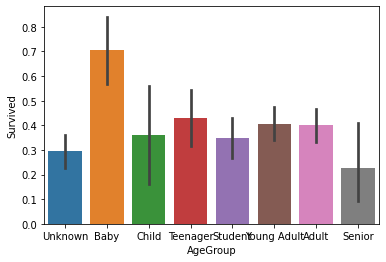

In [23]:
# HERE
sns.barplot(x="AgeGroup", y="Survived", data=train)

We will now use this Age Group to intersect it with the Title use the most frequent age group for each title.

Fill missing age values using a correspondance between Title and mode of each AgeGroup.

1. Find the [mode](https://en.wikipedia.org/wiki/Mode_(statistics)) for each AgeGroup.
2. Make a correspondance between AgeGroup and Title
3. Fill the msising values

In [24]:
master_age = train[train["Title"] == 0]["AgeGroup"].mode() #Baby
miss_age = train[train["Title"] == 1]["AgeGroup"].mode() #Student
mr_age = train[train["Title"] == 2]["AgeGroup"].mode() #Young Adult
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 4]["AgeGroup"].mode() #Adult
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult

In [25]:
age_title_mapping = {0: "Baby", 1: "Student", 2: "Young Adult", 3: "Adult", 4: "Adult", 5: "Adult"}

In [26]:
# For train
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

# For  test
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

### Embarked Feature: fill missing values

#### ❓ **Question** ❓  
How many people have embarked from Southampton (S), Cherbourg (C) and Queenstown (Q) ?

🔴 HINTS 🔴  
`value_counts`

In [27]:
# HERE
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

It's clear that the majority of people embarked in Southampton (S). We will fill in the missing values with S.

#### ❓ **Question** ❓  
Replacing the missing values in the Embarked feature with S

🔴 HINTS 🔴   
`fillna`

In [28]:
# HERE
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

#### One Hot Encoding
We could encode with S: 0, C: 1 and Q: 2 but it would mean that S is closer to C than Q which may not be true in practice. So instead we will create 3 collumns that encode for S, C and Q.

#### ❓ **Question** ❓  
Create 3 collumns that encode for S, C and Q.

🔴 HINTS 🔴   
[`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [29]:
# HERE
one_hot = pd.get_dummies(train['Embarked'])
train = train.drop('Embarked',axis = 1)
train = train.join(one_hot)

one_hot = pd.get_dummies(test['Embarked'])
test = test.drop('Embarked',axis = 1)
test = test.join(one_hot)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,AgeGroup,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2,Student,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,Young Adult,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2,Young Adult,0,0,1


#### ❓ **Question** ❓ Drop name feature
🔴 HINTS 🔴   
`df.drop(['Column_name'], axis='column')` 

In [31]:
train = train.drop(['Name'], axis = 1) # EDIT ME
test = test.drop(['Name'], axis = 1) # EDIT ME

#### ❓ **Question** ❓ Encode sex feature
🔴 HINTS 🔴   
`le = preprocessing.LabelEncoder()` 

In [32]:
le = preprocessing.LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'].values)
test['Sex'] = le.transform(test['Sex'].values)

#### ❓ **Question** ❓ Drop fare values as it is redundant with class information
🔴 HINTS 🔴   
`df.drop(['Column_name'], axis='column')` 

In [33]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

#### ❓ **Question** ❓ Encode age groupe and drop age column
🔴 HINTS 🔴   
- `le = preprocessing.LabelEncoder()` 
- `df.drop(['Column_name'], axis='column')` 

In [34]:
le = preprocessing.LabelEncoder()
train['AgeGroup'] = le.fit_transform(train['AgeGroup'].values)
test['AgeGroup'] = le.transform(test['AgeGroup'].values)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Title,AgeGroup,C,Q,S
0,1,0,3,1,1,0,2,4,0,0,1
1,2,1,1,0,1,0,3,0,1,0,0
2,3,1,3,0,0,0,1,6,0,0,1
3,4,1,1,0,1,0,3,6,0,0,1
4,5,0,3,1,0,0,2,6,0,0,1


More imputations methods from Sklearn can be found [here](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py).

## Section III: Classification using [Logisitic Regresssion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

### [Train/validation split](https://scikit-learn.org/stable/modules/cross_validation.html) 
We will divide the training data in two sets:
- The train set to train the model on
- The validation set to estimate performance and track it

⚠️ The validation set is different from the test set defined above. This validaton set is used to have an estimation of the classification performance while the test set is used in the competition (we don't have the corresponding labels).

In [36]:
from sklearn.model_selection import train_test_split

# Get labels
targets = train["Survived"] 
predictors = train.drop(['Survived', 'PassengerId'], axis=1) # PassengerId is only useful to take part to Kaggle competition
X_test = test.drop(['PassengerId'], axis=1)

# Use 20% of data as validation
x_train, x_val, y_train, y_val = train_test_split(predictors, targets, test_size = 0.20, random_state = 1)

### Train the model

Here we will use [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) from Sklearn. It allows to chain pre-processing operators (here standard deviation normalization) with classifier in a pipeline. 
You have to: 
1. Instanciate a classifier and set the hyper-parameters (here they are left to default)
2. Put pre-processing and classifier in a Pipeline
6. Train the pipeline. In scikit-learn, all classifier have `.fit(X_train, y_train)` method to train it.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

clf = LogisticRegression()  # EDIT ME

model = make_pipeline(StandardScaler(), clf)

model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Estimate performance
After training the model, you can call `clf.predict(X)` to compute a prediction.  
With the validation set we will have an estimation of the performance of the model. Estimating the performance on the same set that has been used for training would be overfiting. It is the same when you take an exam: questions are from the same set that you had during lectures but not exactlly the same otherwise to avoid by heart.   

In [38]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_val)
acc_logreg = accuracy_score(y_pred, y_val) * 100
print("Accuracy on the validation set: {0:.2f}%".format(acc_logreg))

Accuracy on the validation set: 75.98%


Less than the guess on gender !!

### Test with anoter train/test split

In [39]:
# Use 20% of data as validation
x_train, x_val, y_train, y_val = train_test_split(predictors, targets, test_size = 0.20, random_state = 55)

In [40]:
model = make_pipeline(StandardScaler(), clf)

model.fit(x_train, y_train)
acc_logreg = model.score(x_val, y_val) * 100
print("Accuracy on the validation set: {0:.2f}%".format(acc_logreg))

Accuracy on the validation set: 79.33%


Now it's 1% better !! Depending on the train/split we can have large difference in the estimation of the accuracy (here about 3%). One should be able to measure and take into account the variance of this estimation.

[**Cross-validation**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) was designed for the estimation of accuracy variance ! The training data are divided into **K** folds, **K-1** folds are used to train model and 1 fold to estimate performance. Then the folds used to train and test the model are rotated so we obtain **K** estimation of the performance with **K** distinct training sets.

![](img/grid_search_cross_validation.png)

#### ❓ **Question** ❓ Use [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) to perform 5-folds cross validation for the accuracy estimation
🔴 HINTS 🔴   
- `n_jobs = -1` option allows to run the training for each fold in parallel.
- Another scoring method can be provided to the `scoring` argument

In [41]:
from sklearn.model_selection import cross_val_score
model = make_pipeline(StandardScaler(), clf)

scores = cross_val_score(model, predictors, targets, cv = 5, n_jobs = -1) * 100
print(scores)


[77.65363128 79.7752809  76.40449438 76.96629213 82.58426966]


In [42]:
print("Mean accuracy on the 5-folds cross-validation : {0:.2f}%".format(scores.mean()))
print("Standard deviation of the accuracy on the 5-folds cross-validation : {0:.2f}%".format(scores.std()))

Mean accuracy on the 5-folds cross-validation : 78.68%
Standard deviation of the accuracy on the 5-folds cross-validation : 2.26%


#### Take part to the Kaggle competition 

In [43]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

You can use this `submission.csv` file to try to participate to the Kaggle competition ! 

### Feature importance with Logistic Regression
Logistic Regression is a linear regression associated with a non-linearity: sigmoid function (more details in the slides of the lecture).

You can access the weights of the linear regression to estimate feature importance. It would provide some interpretability to the model.  


⚠️ This feature importance is associated with the model, it is not something that should be extrapolated further. 

In [ ]:
print(model[1].coef_)

In [ ]:
model[1].coef_.shape

In [ ]:
x_train.columns

In [ ]:
coefs = pd.DataFrame(
   model[1].coef_.T,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Logistic Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Section IV: Classification using RandomForest

![](https://i.imgur.com/AC9Bq63.png)

#### ❓ **Question** ❓ Do the same but this time with a Random Forest classifier and using only 4 features: **"Pclass"**, **"Sex"**, **"SibSp"**, and **"Parch"**. 
🔴 HINTS 🔴   
- `from sklearn.ensemble import RandomForestClassifier`
- `rf = RandomForestClassifier(n_estimators=20, max_depth=2, max_features=2, random_state=1)` 


With random forest you can also plot feature importance: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [ ]:
# HERE
from sklearn.ensemble import RandomForestClassifier

features = ["Pclass", "Sex", "SibSp", "Parch"]
predictors = train[features]
x_train, x_val, y_train, y_val = train_test_split(predictors, targets, test_size = 0.22, random_state = 42)
X_test = test[features]

rf = RandomForestClassifier(n_estimators=20, max_depth=2, max_features=2, random_state=1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
acc_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy on the validation set: {0:.2f}%".format(acc_rf))

## Section V: harder, bettter, faster, stronger

#### ❓ **Question** ❓ Try to do better !!
🔴 HINTS 🔴
* Have a [cross-validation procedure](https://scikit-learn.org/stable/modules/cross_validation.html) for better performance estimation
* Use more features and [select them](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)
* Optimized hyper-parameters (using [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV);
* More advanced classification algorithms such as [`Gradient Boosting classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
# HERE